<h1><center> A simulation of economic effects of population aging</center></h1>
<h2><center> Maria Cristina Niero </center></h2>
<h2><center>  August 2022 </center></h2>

**N.B.:** The whole notebook takes about 1 hour and 20 minutes to run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings

# 1. The production sector

The production sector is populated by competitive firms manufacturing a
single good through a Cobb-Douglas production function which takes capital
and tasks as inputs.

##### Parameters setting

In [2]:
Γ = 6.15 #cross-country differences that affect production function
γ = 0.25 #output elasticity parameter
α = 1 #efficiency of the activities for bringing new machine into use
w_t = 1.5 #real wage cost
A = 1 #level of technological knowledge the firm has free access at t
ω_t = w_t/A   #wage cost at t before automation investment is undertaken
K_t = 5 #initial fixed capital

The firm analyzed manufactures a single good using capital and tasks as inputs, and the following production function applies: 

$$Y_t = \Gamma K_t^{\gamma}N^{1-\gamma}_t, \quad 0<\gamma<1$$

here, $Y_t$ indicates the total output of the manufactured good, $K_t$ the amount of fixed capital, $N_t$ the number of tasks performed; $\Gamma>0$ is a parameter that measures cross-country differences affecting total-factor productivity.

In [3]:
def production_function (K_t, N_t):
    Y_t = Γ*(K_t**γ)*(N_t**(1-γ))
    return Y_t

Each single task $n \in N_t$ is performed using labor and machines. In particular, the production function of task $n$ is 

$$1 = a_t(n)h_t(n)$$

where $a_t(n)$ denotes the productivity per hour worked, and $h_t(n)$ is the number of working hours. 

Productivity per working hour depends on available technology, $A_{t-1}$, and the growth rate of productivity per working hour, $q_(n)$:

$$a_t(n) = A_{t-1}(1+q_t(n)), \quad q_t(n) {\geq} 0$$

For having $q_t(n) > 0$ an investment has to be undertaken. The total investment outlays is

$$i_t(n) = \alpha q_t(n), \quad \alpha > 0 $$

where $\alpha$ simply measures the efficiency of the activities required for bringing the new machine into use.

In [4]:

#investment outlays for new machines depends on growth rate of productivity per working hour(q)
#and efficiency of the activities for bringing new machine into use (alpha)

def investment(q_t):
    i_t = α*q_t
    return i_t



#growth rate of productivity per working hour is the inverse of the investment function

def growth_rate(i_t):
    q_t = i_t/α
    return q_t



#productivity per hour worked on the performance of task n
#depends on avaiable technological knowledge at t-1 (A) and growth rate of productivity per working hour at t (q)

def productivity_hour(A, q_t):
    a_t = A*(1 + q_t)
    return a_t



#unit isoquant for task n (set of necessary combinations of working hours, h_t, and investment outlays, i_t)

def isoquant(A, i_t):
    h_t = 1/productivity_hour(A, i_t)
    return h_t


##### Plots

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\888858197.py:30: RuntimeWarning: divide by zero encountered in true_divide
  h_t = 1/productivity_hour(A, i_t)


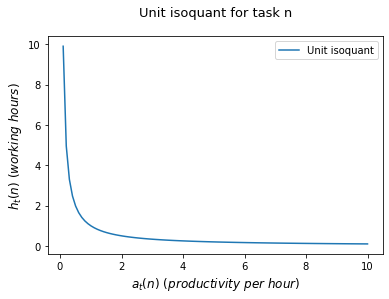

In [5]:

grid_A = np.linspace(0,10,100) #values for A (available technology at t-1)

fig, ax = plt.subplots() 

#title
plt.title('Unit isoquant for task n', fontsize=13, pad = 20)

#plot isoquant function
ax.plot(productivity_hour(grid_A, 0), isoquant(grid_A, 0), label='Unit isoquant')

#labels
ax.set_xlabel('$a_t(n) \ (productivity \ per \ hour)$', fontsize=12)
ax.set_ylabel('$h_t(n) \ (working \ hours)$',  fontsize=12)

ax.legend()


## 1.3. Cost minimization

The cost of task $n$ is given by the cost of labor, $w_t h_t(n)$, and investment outlays

$$c_t(n) = \frac{w_t}{A_{t+1}(1+q_t(n))} + i(q_t(n))$$

The cost minimization problem is

$$\min_{[q_t(n)]_{n=0}^{\infty}} c_t(n) = \frac{\omega _t}{1 + q_t(n)} + \alpha q_t(n)$$

where $\omega_t \equiv w_t / A_{t-1}$ denote the wage cost at $t$ before automation investment. 

In [6]:

#some functions needed for finding cost minimizing levels of key variables.


#cost function

def cost_function(ω_t, q_t):
    c_t = ω_t/(A*(1+q_t))+investment(q_t) #labor cost + investment cost
    return c_t



#derivative of the cost function

def cost_function_prime(ω_t, q_t):
    prime = -ω_t/((1+q_t)**2) + α
    return prime



#Optimal level of q_t is the level that minimizes the cost function

def opt_growth(ω_t): 
    
    def prime(q_t): #derivative of cost function depending only on q
        return cost_function_prime(ω_t, q_t) 
    
    if ω_t >= α :
        q_star = fsolve(prime,0) #find zero of the derivative
    else:
        q_star = 0 
   
    return q_star



once $q_t$ is optimally determined, cost-minimizing choices are

$$h_t = \frac{1}{A_{t-1}(1 + q_t)} \quad \quad i_t = \alpha q_t \quad \quad c_t = \frac{\omega_t}{1 + q_t} + i_t $$ 

In [7]:
#cost minimizing choices

def optimal_hours(ω_t):
    return (1/(1+opt_growth(ω_t)))/A

def optimal_investment(ω_t):
    return α*opt_growth(ω_t)

def optimal_cost(ω_t):
    return cost_function(ω_t, opt_growth(ω_t))

##### Plots

Let's see an example of cost minimization for $\omega_𝑡 = 2$  :

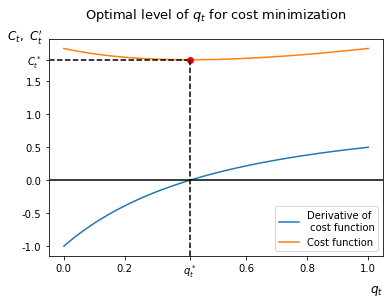

In [8]:
ω_t = 2

#grid for q_t
grid_q = np.linspace(0,1,100) 


fig, ax = plt.subplots()

#set title
ax.set_title('Optimal level of $q_t$ for cost minimization', fontsize=13, pad = 20)

#set labels
ax.set_xlabel('$q_t$', loc='right', fontsize=12)
ax.set_ylabel('$C_t, \ C^\prime_t$', fontsize=12, rotation=0)
ax.yaxis.set_label_coords(-0.07,0.97)

#plot functions
ax.plot(grid_q, cost_function_prime(ω_t , grid_q), label = 'Derivative of \n cost function')
ax.plot(grid_q, cost_function(ω_t , grid_q), label = 'Cost function')
ax.plot(opt_growth(ω_t), optimal_cost(ω_t), 'ro') 

#plot dotted lines
ax.axvline(x = opt_growth(ω_t), ymax = 0.9, linestyle='--', color='k')
ax.axhline(y=optimal_cost(ω_t), xmax=0.415, linestyle='--', color = 'k')
ax.axhline(y=0, color='k')

#set ticks
ax.set_yticks(np.concatenate((np.arange(-1, 2, 0.5), optimal_cost(ω_t))), ['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '$C^*_t$'])
ax.set_xticks([0.0, 0.2, float(opt_growth(ω_t)), 0.6, 0.8, 1.0], ['0.0', '0.2', '$q^*_t$', '0.6', '0.8', '1.0'])

ax.legend()


The optimal growth rate of productivity per hour is higher the higher is the wage cost under the old technology, $\omega_t$. 
<br>
If wage cost under the old technology is cheaper than installing new machinery ($\omega_t \leq \alpha$), then $q^*_t$ is equal to zero.
<br>
This can be seen from the graph below:

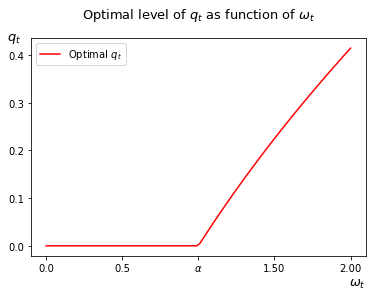

In [9]:
grid_ω = np.linspace(0,2,100) #values for ω_t

fig, ax = plt.subplots()

#set title
ax.set_title('Optimal level of $q_t$ as function of $\omega_t$', fontsize=13, pad = 20)

#set labels
ax.set_xlabel('$ω_t$', loc='right', fontsize=13)
ax.set_ylabel('$q_t$', fontsize=13, rotation=0, labelpad=0)
ax.yaxis.set_label_coords(-0.05,0.97)

#plot function
#compute optimal q for every value of omega in grid
ax.plot(grid_ω, np.asanyarray([opt_growth(i) for i in grid_ω], dtype=object) , 'r', label='Optimal $q_t$') 

#set ticks
ax.set_xticks(np.arange(0, 2.25, 0.5), ['0.0', '0.5', '$\\alpha$', '1.50', '2.00'])

ax.legend()

plt.savefig('optimal_q', facecolor='white')

If $\omega_t > \alpha$, then an automation investment is made: productivity per hour increases, reducing the working hours required to complete a task; this is called *rationalization effect*. 
<br>
Moreover, the overall cost per task is reduced by the cost-minimizing investment: a *productivity effect* is risen.
<br>
This is shown in the graph below:

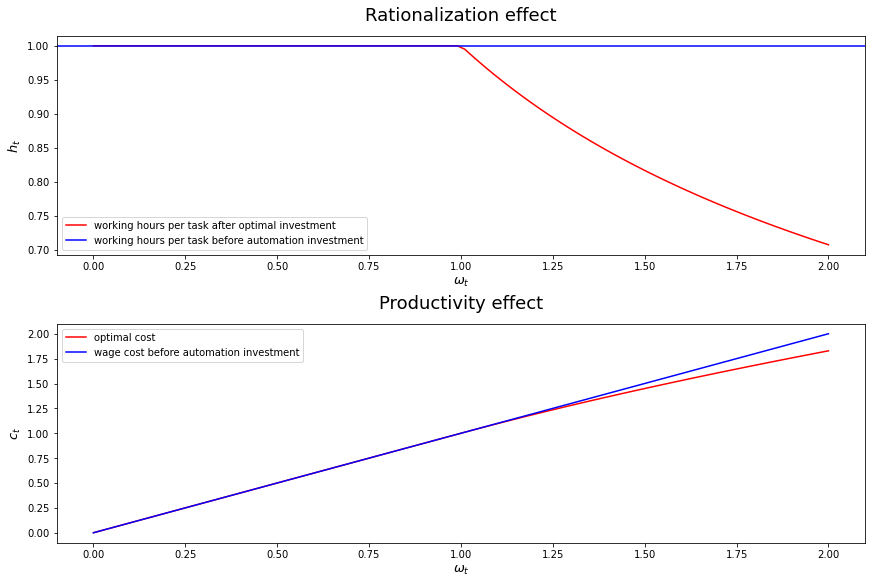

In [10]:
fig, ax  = plt.subplots(2, constrained_layout=True, figsize=(12,8))

#set labels
ax[0].set_xlabel('$ \omega_t $', fontsize = 13)
ax[1].set_xlabel('$ \omega_t $', fontsize = 13)
ax[0].set_ylabel('$h_t$', fontsize=13)
ax[1].set_ylabel('$c_t$', fontsize=13)

#####################################################
#rationalization effect

ax[0].set_title('Rationalization effect', fontsize=18, pad = 15)

#plot hours worked per task if optimal investment is undertaken
ax[0].plot(grid_ω, np.asanyarray([optimal_hours(i) for i in grid_ω], dtype=object), 'r', label= 'working hours per task after optimal investment')

#if investment in new machinery is not undertaken, the hours needed to perform a task are
#1/A_{t-1} (i.e. the unit isoquant if q = 0)
ax[0].axhline(isoquant(A, 0) , color ='b', label ='working hours per task before automation investment')

ax[0].legend()


####################################################
#productivity effect

ax[1].set_title('Productivity effect', fontsize=18, pad = 15)

#plot cost per task if optimal investment is undertaken
ax[1].plot(grid_ω, np.asanyarray([optimal_cost(i) for i in grid_ω], dtype=object), 'r', label  = 'optimal cost')

#if investment in new machinery is not undertaken, the hours needed to perform a task are
#simply equal to wage cost before automation investment, omega
ax[1].plot(grid_ω, grid_ω, 'b', label = 'wage cost before automation investment')

ax[1].legend()


## 1.4. Profit maximization at minimized costs

Once the cost-minimizing $q_t(n)$ has been set, the firm has to optimally specify the number of tasks $N_t$ to be performed.
<br>
In particular, the problem is the following

$$\max_{N_t, K_t} \Pi_t = \Gamma K^\gamma_tN^{1-\gamma}_t - R_tK_t - c_tN_t$$

where $\Pi_t$ indicates profits at $t$.

This problem leads to first-order conditions:

\begin{equation}
    \begin{cases}
    \begin{aligned}
        \dfrac{\partial \Pi_t}{\partial N_t} & : \quad \Gamma(1-\gamma)K^\gamma_t N^{-\gamma}_t - c_t = 0 \\
        \dfrac{\partial \Pi_t}{\partial K_t} & : \quad \Gamma \gamma K^{\gamma -1}_t N^{1-\gamma}_t - R_t = 0
    \end{aligned}
    \end{cases}
\end{equation}

by solving $\frac{\partial \Pi_t}{\partial N_t} = 0$ profit-maximizing choices are retrieved, while by $\displaystyle\dfrac{\partial \Pi_t}{\partial K_t} = 0$ the factor price frontier $R_t = \gamma Y_t / K_t$ is derived.

In [11]:

#profit function

def profit(N_t, ω_t, q_t, K_t):
    π = production_function(K_t, N_t) - R_t(ω_t, K_t)*K_t - cost_function(ω_t, q_t)*N_t
    return π



#derivative of profit function

def profit_prime(N_t, ω_t, q_t, K_t):
    return Γ*(1 - γ)*(K_t**γ)*(N_t**(- γ)) - cost_function(ω_t, q_t)


##############################################################


#profit maximizing choices:

#optimal number of tasks is found by setting derivative of profits
#with respect to number of tasks equal to zero

def optimal_N(ω_t, q_t, K_t):
    
    def profit_prime_2(N_t):
        return profit_prime(N_t, ω_t, q_t, K_t)

    return fsolve(profit_prime_2, 0.01)



#optimal level of output is the one that can be produced with the given K and the
#profit maximizing number of tasks performed

def optimal_Y (ω_t, q_t, K_t):
    return production_function(K_t, optimal_N(ω_t, q_t, K_t))



#factor price frontier

def R_t(ω_t, K_t): 
    return γ*optimal_Y(ω_t, opt_growth(ω_t), K_t)/K_t

##### Plots

An example of profit maximization with $\omega_t = 2 $:

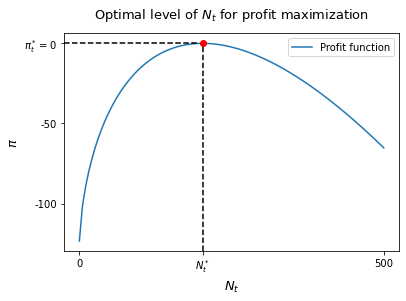

In [12]:
ω_t = 2

grid_N = np.linspace(0,500,100) #values for N

#compute profit maximizing number of tasks for omega=2
N_star = optimal_N(ω_t, opt_growth(ω_t), K_t)



fig, ax = plt.subplots()

#title
ax.set_title('Optimal level of $N_t$ for profit maximization', fontsize= 13, pad = 15)

#set labels
ax.set_xlabel('$N_t$', fontsize=13)
ax.set_ylabel('$π$', fontsize=13)


#plot functions

#profits computed for every N, with q set at the cost-minimizing level
ax.plot(grid_N, profit(grid_N, ω_t, opt_growth(ω_t), K_t), label = 'Profit function')

#plot profit maximizing number of tasks
ax.plot(N_star, profit(N_star, ω_t, opt_growth(ω_t), K_t), 'ro')


#plot dotted lines
ax.axhline(y = profit(N_star, ω_t, opt_growth(ω_t), K_t), xmax = 0.4, linestyle ='--', color = 'k')
ax.axvline(x = N_star, ymax = 0.95, linestyle= '--', color = 'k')

#set ticks
ax.set_xticks(np.asarray((0, float(N_star), grid_N[-1])), ['0', '$N^*_t$', str(int(grid_N[-1]))])
ax.set_yticks(np.arange(-100, 50, 50), ['-100', '-50','$\pi^*_t = 0$'])

ax.legend()


If  $\omega_t > \alpha$  then firms undertake automation investments.
<br>
If automation investment is undertaken, then the productivity effect determines a lower overall cost per task: it follows that the optimal number of tasks performed increases, producing a so-called *task expansion effect*. As a consequence, produced output increases, generating the *output expansion effect*.
<br>
See graph below:

C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


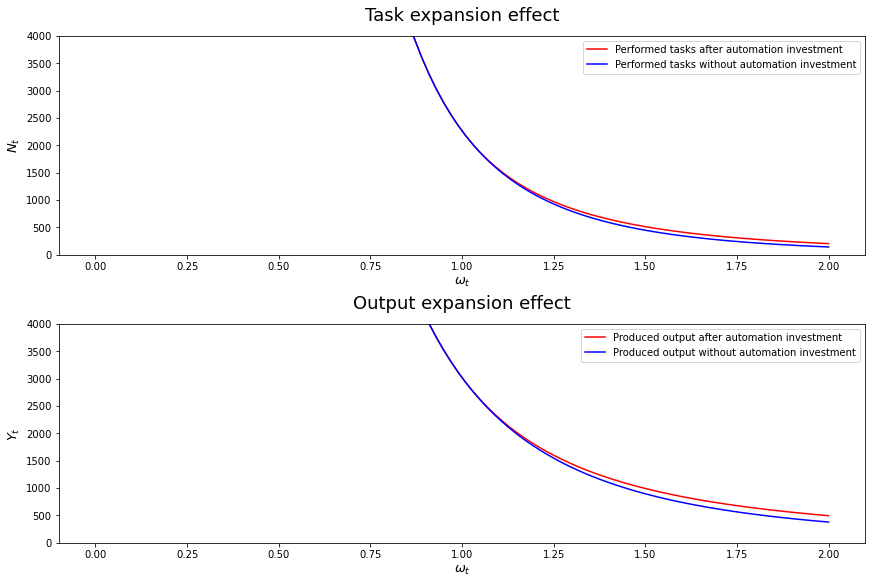

In [13]:

fig, ax = plt.subplots(2, figsize=(12,8),constrained_layout=True)

ax[0].set_ylim([0, 4000])
ax[1].set_ylim([0, 4000])

#set axis labels
ax[0].set_xlabel('$\omega_t$', fontsize = 13)
ax[0].set_ylabel('$N_t$', fontsize = 13)
ax[1].set_xlabel('$\omega_t$', fontsize = 13)
ax[1].set_ylabel('$Y_t$', fontsize = 13)

#set titles
ax[0].set_title('Task expansion effect', fontsize = 18, pad = 15)
ax[1].set_title('Output expansion effect', fontsize = 18, pad = 15)


#plot functions

#optimal N for every omega, given that cost minimizing investment has been undertaken
ax[0].plot(grid_ω, np.asanyarray([optimal_N(i, opt_growth(i), K_t) for i in grid_ω], dtype=object), 'r', label='Performed tasks after automation investment')

#Optimal N for every omega, if investment is zero
ax[0].plot(grid_ω, np.asanyarray([optimal_N(i, 0, K_t) for i in grid_ω], dtype=object), 'b', label = 'Performed tasks without automation investment')

#Optimal level of output for every omega, given that cost minimizing investment has been undertaken
ax[1].plot(grid_ω, np.asanyarray([optimal_Y (i, opt_growth(i), K_t) for i in grid_ω], dtype=object), 'r', label='Produced output after automation investment')

#Optimal level of output for every omega, if investment is zero
ax[1].plot(grid_ω, np.asanyarray([optimal_Y (i, 0, K_t) for i in grid_ω]), 'b',label='Produced output without automation investment')

ax[0].legend()
ax[1].legend()


## 1.5. Automation and the labor share

It is worth spending some time investigating the relationship between automation and labor share, because it would become useful later for examining how population aging affects automation and consequently labor share.

As seen in the previous section, profit maximization leads to $\Pi_t = 0$. It follows that

\begin{equation} \tag{21}
    Y_t - R_t K_t - w_t h_t N_t - i_t N_t = 0
\end{equation}

Gross domestic product at $t$, $GDP_t$, can be defined as

\begin{equation} \tag{22}
    GDP_t = Y_t - i_t N_t
\end{equation}

Using (21) and (22) together, we get $R_t K_t + w_t h_t N_t = GDP_t$. 
<br>
The labor share, $LS_t$, can be defined as the fraction of labor income over the total earned income 

\begin{equation}
    LS_t = \dfrac{w_t h_t N_t}{GDP_t}.
\end{equation}

In [14]:

#GDP is given by optimal level of output minus total investment
def GDP(ω_t, K_t):
    return optimal_Y(ω_t, opt_growth(ω_t), K_t) - investment(opt_growth(ω_t))*optimal_N(ω_t, opt_growth(ω_t), K_t)

#labor share
def labor_share(ω_t, K_t):
    return ω_t*A*optimal_hours(ω_t)*optimal_N(ω_t, opt_growth(ω_t), K_t)/GDP(ω_t, K_t)

##### Plots

Higher $\omega_t$ increases the incentive to automate, involving investment outlays which rise capital share, $R_tK_t/GDP_t$, and reduces labor share.
<br>
However labor share remains always strictly positive

$$\lim_{w_t \to \infty} LS_t = \tfrac{1 - \gamma}{1+\gamma}$$ 

This result is plotted below:

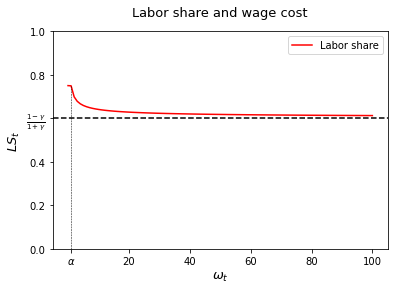

In [15]:
#a large grid for omega
grid=np.linspace(1e-11,100,100)



fig, ax = plt.subplots()

ax.set_ylim([0,1])

#title
ax.set_title('Labor share and wage cost', fontsize=13, pad=15)

#set labels
ax.set_xlabel('$\omega_t$', fontsize=13)
ax.set_ylabel('$LS_t$', fontsize=13)

#plot functions
ax.plot(grid, [labor_share(i, K_t) for i in grid], 'r', markersize=1, label = 'Labor share')
ax.axhline(y=(1-γ)/(1+γ), color = 'k', linestyle='--') #limit of labor share

#plot dotted lines
ax.axvline(x=α, ymax=0.75, linestyle='--', color='k', linewidth=0.5)

#set ticks
ax.set_yticks(np.linspace(0,1,6), ['0.0', '0.2', '0.4', '$\\frac{1-\gamma}{1+\gamma}$', '0.8', '1.0'])
ax.set_xticks([α, 20, 40, 60, 80, 100], ['$\\alpha$', '20', '40', '60', '80', '100'])

ax.legend()


# 2. The household sector

The household sector is composed of many utility-maximizing individuals who live possibly for two periods, namely young and old age; they face a probability of surviving the young age and entering the old age, which is denoted by $\mu \in (0,1)$ and it measures the longevity of the population.
<br>
In every period $t$, the total number of young individuals is denoted by $L_t$ (cohort $t$), while the old individuals are $\mu L_{t-1}$.
<br>
The number of young individuals from one period to another grows at a rate $g_L \in (0,1)$, which I will refer to as the fertility rate.

Each individual has to choose how to allocate time between leisure, denoted by $l_t$, and labor, $h^s_t$. Periodic time endowment is normalized to unity, hence $h^s_t = 1-l_t$. Moreover, they choose over their consumption when young, $c^y_t$ and consumption when old, $c^o_{t+1}$.
<br>
Utility function takes the following form

\begin{equation} 
    U(c^y_t, l_t, c^o_{t+1}) = \ln c^y_t + \ln(1 - \phi(1 - l_t)(c^y_t)^\frac{v}{1-v}) + \mu \beta \ln c^o_{t+1}
\end{equation}

where $0<\beta<1$ is the time discount factor, $\phi>0$ captures characteristics of the labor market that affect the disutility of labor irrespective of the number of hours worked, $v \in (0,1)$ is wage elasticity of hours worked.
<br>
Savings collected during the young age are returned to the individuals of cohort $t$ in the old age at a rate $R_{t+1}$ per unit of savings. Hence, cohort t faces the following budget constraints

\begin{equation} \tag{27}
    c^y_t + s_t \leq w_t(1-l_t) \quad \textit{and} \quad c^o_{t+1} \leq \frac{R_t+1}{\mu}s_t.
\end{equation}

The optimal plan $(c^y_t, l_t, c^o_{t+1}, s_t, h^s_t)$ of cohort $t$ is found by solving

\begin{equation} \label{max utility}
    \begin{aligned}
        \max_{(c^y_t, l_t, c^o_{t+1}, s_t) \in PxR} & U(c^y_t, l_t, c^o_{t+1}) \\
    \textit{subject to } & (27)
    \end{aligned}
\end{equation}

where $P$ is the set of permissible bundles, i.e.: the set of bundles $(c^y_t, l_t, c^o_{t+1}) \in \mathbb{R}_{++} \times [0,1] \times \mathbb{R}_{++}$ such that utility U is strictly monotone and strictly concave. 
<br>
For the unique bundle identified by the maximization problem to be a global maximum on the choice set $P \times \mathbb{R}$, it must be that

\begin{align*}
    & w_t > w_c \equiv \left(\frac{(1 + \mu \beta)(1-v)}{(\phi(1+(1+\mu \beta)(1-v)))^{1-v}(1-v(1+\mu \beta))^v)}\right)^{\frac{1}{v}} \\
    \textit{and} & \\
    & 0 < v < \bar{v}(\mu \beta) \equiv \frac{3 + \mu \beta - \sqrt{5 + \mu \beta (2 + \mu \beta)}}{2(1 + \mu \beta)}.
\end{align*}

##### Parameters setting

In [16]:
μ = 0.7 #survival probability in old age
g_L = 0.35 #fertility rate
β = 10/21 #discount factor
v = 1/4 #wage elasticity of hours worked
ϕ = 1/2*(3/2)**(1/3) #disutility of labor irrespective of the amount of hours worked and the level of consumption
R_tplus1 = 1.2 #let's assume the interest rate on capital in t+1 is 0.2 (this assumption does not affect results)

In [17]:

#Utility depends on consumption when young, leisure time when young and consumption when old

def Utility (c_y, l_t, c_o, μ):
 
    return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)



#######################################################################################



#budget constraints:

#consumption when young
def cy_constraint(l, w_t): 
    return np.linspace(1e-11, w_t*(1-l),50)

#savings
def s(l,cy,w_t): 
    return w_t*(1-l) - cy

#consumption when old
def co_constraint(s, μ):
    return np.linspace(1e-11, R_tplus1*s/μ , 50)


    
#####################################################################################



# we consider only w_t > wc , so that demand for leisure is strictly positive
def wc(μ,β,v):
    num = (1+μ*β)*(1-v)
    den1 = (ϕ*(1+(1+μ*β)*(1-v)))**(1-v)
    den2=(1-v*(1+μ*β))**v
    wc = (num/(den1*den2))**(1/v)
    return wc 

#if < v < v_max then the unique bundle associated to the Utility maximization problem is a global maximum on the choice set PxR
def v_max(μ, β): 
    return (3 + μ*β - (5 + μ*β*(2 + μ*β))**(0.5)) / (2*(1 + μ*β))



####################################################################################



#find the Utility maximization bundle

def optimal_plan(w_t, μ):
    
    if w_t > wc(μ,β,v) and v < v_max(μ, β): #set condition  for having an optimal bundle in P
        
        l_t = np.linspace(0,1,50) #values for leisure

        
        #compute utility for every possible choice of leisure time, consumption when young, consumption when old
        U = [ [ [Utility (c, l, co, μ) for co in co_constraint(s(l,c,w_t), μ) ] for c in cy_constraint(l, w_t)] for l in l_t]
        
        
        #find the indexes that maximize the list of utility 
        plan = np.unravel_index(np.nanargmax(U),(50,50,50))

        
        
        #these indexes indicates the combination of leisure, consumption when young and consumption when old
        #that maximizes utility
        
        #the first index indicates the leisure that maximizes utility
        opt_l = l_t[plan[0]] 
        
        #given leisure, the second index indicates the consumption when young that maximizes utility
        opt_cy = cy_constraint(opt_l, w_t)[plan[1]]
        
        #optimal savings are uniquely determined, given l, cy, w
        opt_s = s(opt_l, opt_cy, w_t)
        
        #consumption when old is uniquely determined
        opt_co = R_tplus1*opt_s/μ

        return opt_l, opt_cy, opt_co, opt_s

    
    elif w_t < wc(μ,β,v) and v < v_max(μ, β):
        warnings.warn('w_t too low')
        return float("nan"), float("nan"), float("nan"), float("nan")
    
    else:
        warnings.warn('v too high')
        return float("nan"), float("nan"), float("nan"), float("nan")
    

##### Plots

A higher life expectancy increases the supply of hours worked (hence decreases leisure time in t), due to the appreciation of utility when old.
<br>
Consumption when young decreases, because the individual wants to shift resources to the second period of life, and this effect dominates the income effect linked to an increased supply of hours worked.
<br>
Lower propensity to consume during young age and higher wage increase savings, but gross returns on saving $R_{t+1}/\mu$ falls; this latter effect dominates so that $c^o_{t+1}$ falls in $\mu$.
<br>
These effects are summarised in the graphs below:

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


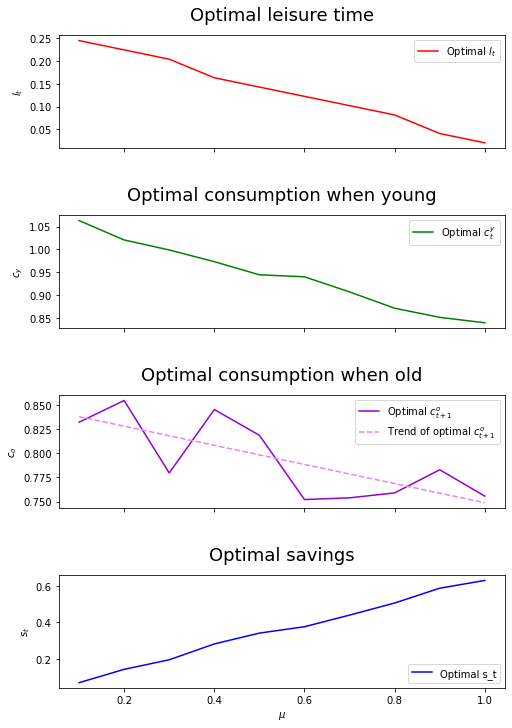

In [18]:

grid_μ=np.linspace(0.1,1,10)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, figsize=(8,12))

plt.subplots_adjust(wspace=0.6, hspace=0.6)

#titles 
ax0.set_title('Optimal leisure time', fontsize=18, pad=15)
ax1.set_title('Optimal consumption when young', fontsize=18, pad=15)
ax2.set_title('Optimal consumption when old', fontsize=18, pad=15)
ax3.set_title('Optimal savings', fontsize=18, pad=15)

#labels
for ax in fig.get_axes():
    ax.label_outer()
ax3.set_xlabel('$\mu$')
ax0.set_ylabel('$l_t$')
ax1.set_ylabel('$c_y$')
ax2.set_ylabel('$c_o$')
ax3.set_ylabel('$s_t$')

#compute optimals plan for each mu
optimals = [optimal_plan(w_t, i) for i in grid_μ]
optimals = np.asarray(optimals)
optimals = optimals.T

#compute the least squares coefficients for plotting the trend that describes consumption when old
μ_T = np.reshape(grid_μ, (10,1)) #transpose grid of mu
co_T = np.reshape(optimals[2], (10,1)) #transpose values of co
avg_μ = np.average(grid_μ) #average of mu
avg_co = np.average(optimals[2]) #average of consumption when old
beta = (grid_μ-avg_μ).dot(μ_T-avg_μ)**(-1)*(grid_μ-avg_μ).dot(optimals[2]-avg_co) #slope of the trend computed by ols
alpha = np.average(optimals[2]) - beta*np.average(grid_μ) #intercept of the trend


#plot optimal choices
ax0.plot(grid_μ, optimals[0], 'r', label='Optimal $l_t$')
ax1.plot(grid_μ, optimals[1] , 'g', label='Optimal $c^y_t$')
ax2.plot(grid_μ, optimals[2] , 'darkviolet', label='Optimal $c^o_{t+1}$')
ax2.plot(grid_μ, alpha + beta*grid_μ, 'violet', linestyle='--', label='Trend of optimal $c^o_{t+1}$')
ax3.plot(grid_μ, optimals[3], 'b', label='Optimal s_t')

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend(loc='lower right')
    

# 3. Inter-temporal general equilibrium

Inter-temporal general equilibrium is given by that price system and allocation such that the production sector is maximizing profit, each cohort is maximizing utility, the market for the produced good clears and there is full employment.

I restrict attention to constellations where firms decide to automate and utility-maximizing cohorts express a strictly positive demand for leisure:

$$ w_t > \alpha A_{t-1} > w_c $$

In [19]:
#model growth of technological knowledge
def A_t(A, ω_t):
    return A*(1+opt_growth(ω_t))

## 3.1. Labor market equilibrium

Aggregate demand for hours worked at $t$ is 

\begin{equation}
    H^d_t = h_t N_t
\end{equation} 

Aggregate supply of hours worked at $t$ for $w_t > w_c$ is 

\begin{equation}
    H^s_t = (1 - l_t)L_t
\end{equation}

and the labor market equilibrium is given by the level of real wage $\hat{w}_t$ and the corresponding level of employment $\hat{H}_t$ such that

\begin{equation}
    H^d(\hat{\omega}_t) = H^s(\hat{\omega}_t, L_t, w_c),
\end{equation}

where $\hat{\omega}_t \equiv \hat{w}_t / A_{t-1}$.

In [20]:
L_t =1000 #number of workers (arbitrarily chosen)

In [21]:

#aggregate demand for hours worked
def ad_hours(ω_t, K_t):
    q_t = opt_growth(ω_t) #set q at its optimal level
    return optimal_hours(ω_t)*optimal_N(ω_t, q_t, K_t)


#aggregate supply of hours worked
def as_hours(ω_t, L_t, μ):
    w_t = ω_t*A #supply of labor depends on real wage
    return (1-optimal_plan(w_t, μ)[0])*L_t


#labor market equilibrium wage 
def eq_wage(L_t, μ, K_t):
    
    def condition(ω_t):
        return ad_hours(ω_t, K_t) - as_hours(ω_t, L_t, μ)
    
    ω = fsolve(condition, 1) #find omega such that ad_hours = as_hours
    return ω


#efficient capital intensity
def eff_k(L_t, K_t, A): 
    return K_t/((A**(1-v))*L_t)

#efficient capital intensity threeshold for the labor mkt equilibrium to exist
def kc(μ):
    return (wc(μ,β,v)**v)*(α**(-v))*((α/(Γ*(1-γ)))**(1/γ))


In [22]:
#check conditions for labor market equilibrium to exist

if eff_k(L_t, K_t, A) > kc(μ) and α*A > wc(μ,β,v) :
    print('A unique labor market equilibrium (w_t, H_t) with w_t > alpha*A exists for all t')
else:
    print('Labor market equilibrium does not exist')


A unique labor market equilibrium (w_t, H_t) with w_t > alpha*A exists for all t


##### Plots

An increase in $\omega_t$ induces an *aggregate rationalization effect* (i.e.: decrease in working hours due to increase of $\omega_t$) and an *aggregate task expasion effect* (i.e.: the increase in costs decrease the optimal number of tasks performed). That's why working hours demand is decreasing in $\omega_t$, as shown below:

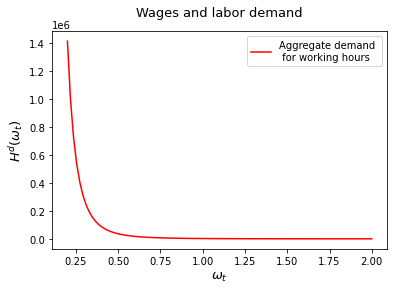

In [23]:
grid_ω = np.linspace(0.2,2,100)

fig, ax = plt.subplots()

#title
ax.set_title('Wages and labor demand', fontsize=13, pad=15)

#labels
ax.set_xlabel('$\omega_t$', fontsize=13)
ax.set_ylabel('$H^d(\omega_t)$', fontsize=13)

#plot function
plt.plot(grid_ω, [ad_hours(i, K_t) for i in grid_ω] ,'r', label='Aggregate demand \n for working hours')

ax.legend()

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


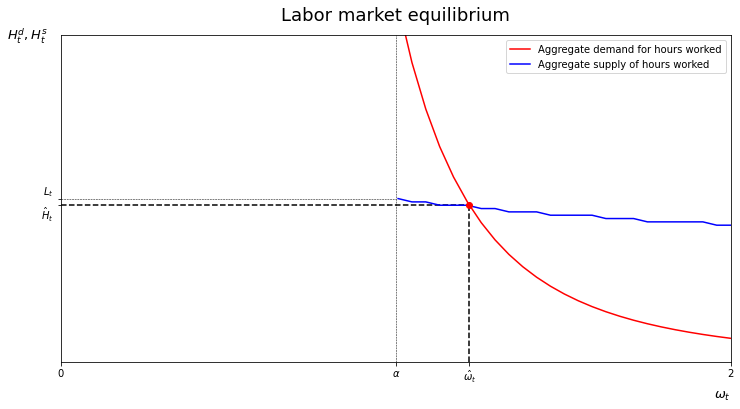

In [24]:

#labor market equilibrium


#grid for omega
grid = np.linspace(0.8,2, 30)

#compute equilibrium wage
ω_star = eq_wage(L_t, μ, K_t)

#compute equilibrium working hours
H_star = ad_hours(ω_star, K_t)


#plot the figure
fig, ax = plt.subplots(figsize=(12,6))

#title
ax.set_title('Labor market equilibrium', fontsize=18, pad=15)

ax.set_ylim(0,2000)
ax.set_xlim(0,2)

#labels
ax.set_xlabel('$ω_t$', fontsize=13, loc='right')
ax.set_ylabel('$H^d_t, H^s_t$', fontsize=13, rotation=0)
ax.yaxis.set_label_coords(-0.05,0.97)

#plot dotted lines
ax.axvline(x=ω_star, ymax=0.47, linestyle='--', color='k') 
ax.axhline(y=H_star, xmax=0.61, linestyle='--', color='k')
ax.axvline(x=α, linestyle='--', color='k', linewidth=0.5) #omega has to be greater than alpha
ax.axhline(y=L_t, xmax=0.5, linestyle='--', color='k', linewidth=0.5) #when omega = alpha everyone is working full time


#plot aggregate demand and supply of hours worked for every omega
ax.plot(grid, [ad_hours(i, K_t) for i in grid], 'r', label='Aggregate demand for hours worked')
ax.plot(grid, [as_hours(i, L_t, μ) for i in grid], 'b', label ='Aggregate supply of hours worked')
ax.plot(ω_star, H_star, 'ro')

#set ticks
ax.set_xticks([0, α, float(ω_star), 2], ['0', '$\\alpha$', '$\\hat{\omega}_t$', '2'])
ax.set_yticks([float(H_star), L_t], ['$\\hat{H}_t$', '$L_t$'])
plt.setp(ax.get_yticklabels()[0], verticalalignment='top')
plt.setp(ax.get_yticklabels()[1], verticalalignment='bottom')

ax.legend()


## 3.2. Dynamical system

In equilibrium, the following equality holds

\begin{equation} \tag{37}
    I^K_t = s_t L_t = K_{t+1}.
\end{equation}

Moreover, it can be proven that efficient capital in $t+1$, $k_{t+1}$, can be expressed as a function of preference and demography parameters

\begin{equation}\tag{38} 
    \begin{split}
        \Omega \omega_t^{1-v} = & k_{t+1}, \text{for all } t = 1,2,...\infty, \\
    \Omega \equiv & \dfrac{\mu \beta w^v_c}{(1 + \mu \beta)(1-v)(1+g_L)} 
    \end{split}
\end{equation}

Equation $(37)$ identifies Capital Market Equilibrium condition.

In [25]:

#define K_t+1 equation
def K_tplus1 (L_t, μ, ω_t, A):
    s_t = optimal_plan(ω_t*A, μ)[3]
    return s_t * L_t

#efficient capital level in capital market equilibrium
def k_tplus1 (L_t, μ, ω_t, A, g_L):
    K = K_tplus1 (L_t, μ, ω_t, A)   #K in t+1
    L_tplus1 = L_t*(1+g_L)   #L in t+1
    A = A_t(A, ω_t)   #A in t
    return eff_k(L_tplus1, K, A)


## 3.3 Steady state

Notice that at each level of $k_t$ (that is defined by certain $K_t, L_t, A_{t-1}) $ corresponds a unique equilibrium wage $\omega_t$. Hence, $\hat{\omega}$ can be expressed as a function of $k_t$, $\omega(k_t)$. 
By replacing $\omega_t$ in $(38)$ with $\hat{\omega}_t = \omega(k_t)$ one can think about the transitional dynamics of the inter-temporal general equilibrium through the evolution of a single state variable, $k_{t}$. This dynamic is described by 

\begin{equation} \tag{39}
    k_{t+1} = \Omega [\omega(k_t)]^{1-v}.
\end{equation}

Steady-state is reached when $k_t = k_{t+1} = k^*$. That is, by substituting $k*$ in the right-hand-side of equation $(39)$, the function should return exactly $k^*$.

In [26]:

#steady state computation

def steady_state(L_t, μ, A, g_L):
    
    #steady state condition is k_t = k_{t+1}
    #given efficient capital in t, k, I compute capital K 
    #I use function eq_wage() for computing the equilibrium wage given k (and the other parameters fixed)
    #once equilibrium wage is determined, k_{t+1} is computed with the apposite function
    def ss_condition(k):
        K = k*(A**(1-v))*L_t
        return k - k_tplus1(L_t, μ, eq_wage(L_t, μ, K), A, g_L)
    
    #find level of k such that k_t = k_t+1
    k_ss = fsolve(ss_condition, 0.4)   
    #equilibrium wage corresponding to k_ss
    ω_ss = eq_wage(L_t, μ, k_ss*(A**(1-v))*L_t)   
    
    return k_ss, ω_ss


If the economy embarks in a steady state (i.e.:  $k_t = k_{t+1} = k^*$ ) in the first period, the results would be the following:

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\4079090199.py:12: RuntimeWarning: invalid value encountered in power
  return Γ*(1 - γ)*(K_t**γ)*(N_t**(- γ)) - cost_function(ω_t, q_t)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:92: 

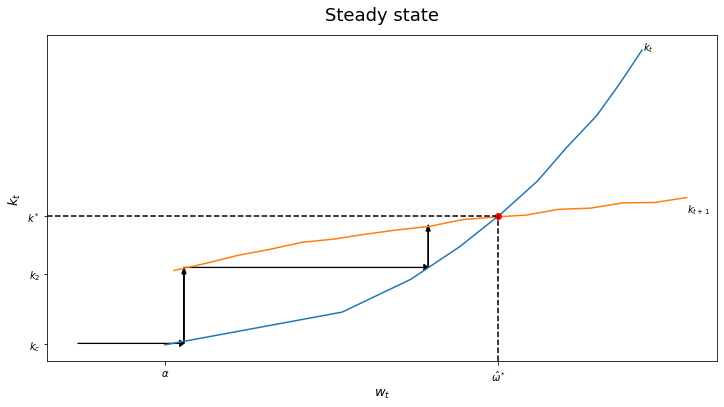

In [28]:

grid_ω = np.linspace(0,7,20)
grid_k = np.linspace(0,1,10)

#compute efficient capital and wage in steady state
k_ss, ω_ss = steady_state(L_t, μ, A, g_L)


fig,ax = plt.subplots(figsize=(12,6))

#title
ax.set_title('Steady state', fontsize=18, pad=15)

#labels
ax.set_xlabel(r'$w_t$', fontsize=13)
ax.set_ylabel(r'$k_t$', fontsize=13)


#plot labor market equilibrium condition
#equilibrium wage is computed for every k
ax.plot([eq_wage(L_t, μ, i*(A**(1-v))*L_t) for i in grid_k], grid_k, label='$k_t$') 

#plot capital market equilibrium condition
#k_{t+1} is computed for every wage
ax.plot(grid_ω, [k_tplus1(L_t, μ, i, A, g_L) for i in grid_ω], label='$k_{t+1}$')

#plot steady state
ax.plot(ω_ss, k_ss, 'ro')

#dotted lines
ax.axvline(x = ω_ss, ymax=0.45, linestyle='--', color='k')
ax.axhline(y = k_ss, xmax=0.67, linestyle='--', color='k')


#plot arrows

ω_1 = float(ω_star)
k_1 = float(eff_k(L_t, K_t, A))
k_2 = float(k_tplus1(L_t, μ, ω_1, A, g_L))
ω_2 = float(eq_wage(L_t, μ, k_2*(A**(1-v))*L_t))
k_3 = float(k_tplus1(L_t, μ, ω_2, A, g_L))

ax.arrow(x=0, y=k_1, dx=ω_1, dy=0, length_includes_head=True, head_width=0.022, head_length=0.05, color='k')
ax.arrow(x=ω_1, y=k_1, dx=0, dy=k_2-k_1, length_includes_head=True, head_width=0.05, head_length=0.022, color='k')
ax.arrow(x=ω_1, y=k_2, dx=ω_2 - ω_1, dy=0, length_includes_head=True, head_width=0.022, head_length=0.05, color='k')
ax.arrow(x=ω_2, y=k_2, dx=0, dy=k_3 - k_2 - 0.005, length_includes_head=True, head_width=0.05, head_length=0.022, color='k')


#label functions
ax.text(6.5, 1, '$k_t$')
ax.text(7, 0.45, '$k_{t+1}$')


#set ticks
ax.set_xticks([α, float(ω_ss)], ['$\\alpha$', '$\\hat{\omega}^*$'])
ax.set_yticks([kc(μ), float(kc_tplus1), float(k_ss)], [ '$k_c$', '$k_2$', '$k^*$'])


# 4. Short-run macroeconomic implications of population aging

In what follows we are going to analyze two identical economies which only differs in $\mu$ and $g_L$.

The implications of an anticipated increase in life expectancy is contemporaneous, while those of a decline in fertility materialize in $t+1$.

## 4.1. Increasing longevity

In the short run an increase in longevity determines a lower level for equilibrium wage and an increase in hours worked in $t$. Indeed, since individuals expect to live longer, they increase their labor supply at the intensive margin. Aggregate labor supply shifts upwards and, being flatter than labor demand, lowers equilibrium wage.

In [29]:
#economy with short-lived individuals
μ0 = 0.4
#labor mkt equilibrium in this economy
ω_star0 = eq_wage(L_t, μ0, K_t)
H_star0= ad_hours(ω_star0, K_t)

#economy with long-lived individuals
μ1 = 0.7
#labor mkt equilibrium in this economy
ω_star1 = eq_wage(L_t, μ1, K_t)
H_star1= ad_hours(ω_star1, K_t)

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v

[None, None]

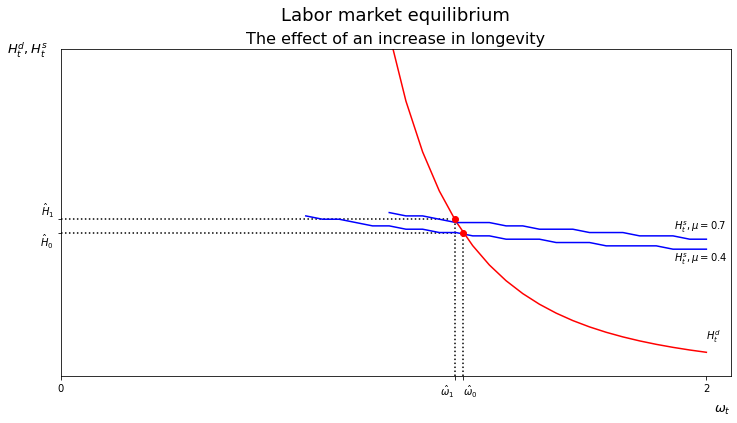

In [30]:
#a grid for wage
grid = np.linspace(0.5,2, 30)


fig, ax = plt.subplots(figsize=(12,6))

ax.set_ylim(0,2000)

#title
mid = (fig.subplotpars.right + fig.subplotpars.left)/2   # Mid point of left and right x-positions
fig.suptitle('Labor market equilibrium', x=mid, fontsize=18)
ax.set_title('The effect of an increase in longevity', fontsize=16)

#axis labels
ax.set_xlabel('$\omega_t$', fontsize=13, loc='right')
ax.set_ylabel('$H^d_t, H^s_t$', fontsize=13, rotation=0)
ax.yaxis.set_label_coords(-0.05,0.97)

#dotted lines
ax.axvline(x=ω_star0, ymax=H_star0/2000, linestyle='dotted', color='k')
ax.axvline(x=ω_star1, ymax=H_star1/2000, linestyle='dotted', color='k')
ax.axhline(y=H_star0, xmax=ω_star0/2.1, linestyle='dotted', color='k')
ax.axhline(y=H_star1, xmax=ω_star1/2.1, linestyle='dotted', color='k')

#plot ad_hours and as_hours for both levels of mu
ax.plot(grid, [ad_hours(i, K_t) for i in grid], 'r', label='Aggregate demand of hours worked')
ax.plot(grid, [as_hours(i, L_t, μ0) for i in grid], 'b', label ='Aggregate supply of hours worked  with $\mu_0 = 0.4$')
ax.plot(grid, [as_hours(i, L_t, μ1) for i in grid], 'b', label ='Aggregate supply of hours worked with $\mu = 0.7$')

#plot equilibrium points
ax.plot(ω_star0, H_star0, 'ro')
ax.plot(ω_star1, H_star1, 'ro')

#label functions
ax.text(1.9, 700, '$H^s_t, \mu = 0.4$')
ax.text(1.9, 900, '$H^s_t, \mu = 0.7$')
ax.text(2, 225, '$H^d_t$')

#set ticks
ax.set_xticks([0, float(ω_star0), float(ω_star1), 2], ['0', '$\\hat{\omega}_0$', '$\\hat{\omega}_1$', '2'])
ax.set_yticks([float(H_star0), float(H_star1)], ['$\\hat{H}_0$', '$\\hat{H}_1$'])
plt.setp(ax.get_yticklabels()[0], verticalalignment='top')
plt.setp(ax.get_yticklabels()[1], verticalalignment='bottom')
plt.setp(ax.get_xticklabels()[1], horizontalalignment='left')
plt.setp(ax.get_xticklabels()[2], horizontalalignment='right')


As a consequence of lower wage, an increase in expected longevity determines a decrease in the growth rate of automation.

[None, None]

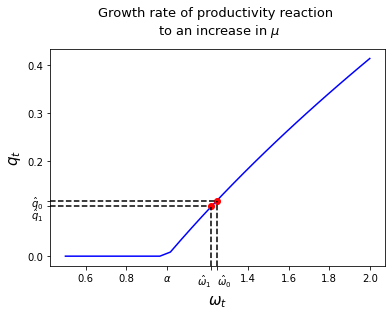

In [31]:
q_0 = opt_growth(ω_star0)
q_1 = opt_growth(ω_star1)

fig, ax = plt.subplots()

ax.set_title('Growth rate of productivity reaction \n to an increase in $\mu$', fontsize=13, pad = 15)

grid_ω = np.linspace(0,2,100) #values for ω_t

ax.set_xlabel('$ω_t$')
ax.set_ylabel('$q_t$')

#set axes labels' fontsize
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

#plotting main function
ax.plot(grid, np.asanyarray([opt_growth(i) for i in grid], dtype=object) , 'b')
ax.plot(ω_star0, q_0, 'ro')
ax.plot(ω_star1, q_1, 'ro')

#plotting dotted lines
ax.axhline(y=q_0, xmax=0.493 , linestyle='--', color='k')
ax.axhline(y=q_1, xmax=0.475 , linestyle='--', color='k')
ax.axvline(x=ω_star0, ymax= 0.3, linestyle='--', color='k')
ax.axvline(x=ω_star1, ymax= 0.27, linestyle='--', color='k')

#setting ticks
ax.set_yticks([0.0, float(q_1), float(q_0), 0.2, 0.3, 0.4], ['0.0', '$\\hat{q}_1$', '$\\hat{q}_0$', '0.2', '0.3', '0.4'])
ax.set_xticks([0.6, 0.8,1, float(ω_star1), float(ω_star0),1.4,1.6,1.8,2], ['0.6', '0.8', '$\\alpha$', '$\\hat{\omega}_1$', '$\\hat{\omega}_0$', '1.4', '1.6', '1.8', '2.0'])
plt.setp(ax.get_xticklabels()[3], horizontalalignment='right')
plt.setp(ax.get_xticklabels()[4],horizontalalignment='left')
plt.setp(ax.get_yticklabels()[1], verticalalignment='top')


GDP is affected through two channels. First, given $\hat{H}_t$, the incentive to automate weakens (as we have seen above, $\hat{q}_t$ is lower); second, given $\hat{q}_t$, the decline in equilibrium wage increases the level of employment, hence more tasks will be performed. As a consequence, GDP increases. 
Moreover, since population $P_t$ is not affected, also per capita GDP increases.

In [32]:
grid_μ=np.linspace(0.1,0.8,5)

#equilibrium wage for each mu
ω_star_list = [eq_wage(L_t, i, K_t) for i in grid_μ]

#GDP corresponding to each value of mu at the labor market equilibrium
eq_GDP = [GDP(ω, K_t) for ω in ω_star_list] 

#computation of total population. Consider that the change in mu is expected, hence I can compute using the old mu
P = L_t + μ*L_t/(1+g_L)  

#per capita GDP 
eq_gdp = [i/P for i in eq_GDP] 

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:92: UserWarning: v too high
  warnings.warn('v too high')


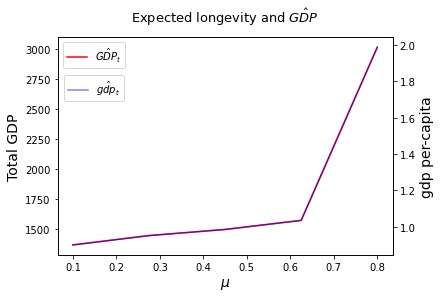

In [33]:


fig, ax = plt.subplots()

#title
ax.set_title('Expected longevity and $\\hat{GDP}$', fontsize = 13, pad = 15)

#axis labels
ax.set_xlabel('$\mu$', fontsize=14)
ax.set_ylabel('Total GDP', fontsize=14)

#plot GDP
ax.plot(grid_μ, eq_GDP, label = '$\\hat{GDP}_t$', color= 'r')

# plot gdp
ax2=ax.twinx()
ax2.plot(grid_μ, eq_gdp, label = '$\\hat{gdp}_t$', color='b', alpha=0.5)
ax2.set_ylabel("gdp per-capita", fontsize=14)

ax.legend()
ax2.legend(loc=1,bbox_to_anchor=(0.212,0.85))

plt.show()


Finally, at the labor market equilibrium, given $k_t$, the labor share increases with $\mu$. Indeed, even if a lower $\hat{w}_t$ decreases the labor share, this effect is dominated by the weaker automation incentives that leads to more hours per task and lower investment outlays (hence, higher labor share).

Text(0.78, 0.747, '$\\hat{LS}_t$')

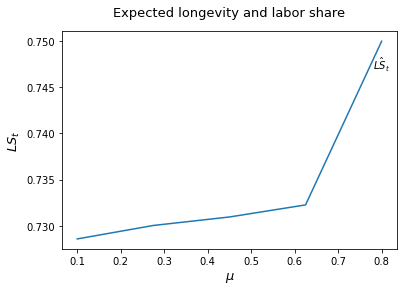

In [34]:
LS = [labor_share(ω , K_t) for ω in ω_star_list]


fig, ax = plt.subplots()

ax.set_title('Expected longevity and labor share', fontsize = 13, pad = 15)

ax.plot(grid_μ, LS)

ax.set_xlabel('$\mu$', fontsize = 13)
ax.set_ylabel('$LS_t$', fontsize = 13)

ax.text(0.78, 0.747, '$\hat{LS}_t$')


## 4.2. Declining fertility

Considering labor market equilibrium at t+1, a higher fertility rate determines:
1. An increase of the equilibrium wage.
<br>
Indeed lower fertility reduces labor supply at t+1 at the extensive margin, increasing the equilibrium wage. 


In [35]:
#equilibrium wage in t
ω_t = ω_star

#set different values for fertility parameters
grid_g = np.linspace(0.1, 0.9, 5)

#compute equilibrium wage in t+1 for different levels of g_L
ω_tplus1 = [eq_wage(L_t*(1+g), μ, K_tplus1(L_t, μ, ω_t, A)) for g in grid_g]

C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  w

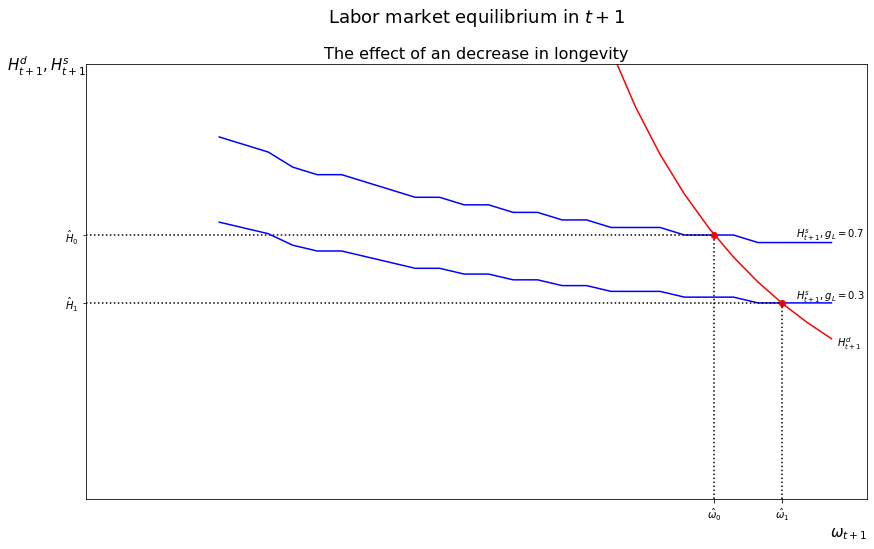

In [36]:
#pick two points from grid_g
g0 = 0.7
g1 = 0.3

#corresponding equilibrium wages
ω0 = ω_tplus1[3]
ω1 = ω_tplus1[1]

#corresponding equilibrium working hours
H0 = ad_hours(ω0, K_tplus1(L_t, μ, ω_t, A))
H1 = ad_hours(ω1, K_tplus1(L_t, μ, ω_t, A))

#a grid for wage
grid = np.linspace(0.5,4.5, 30)

#set the figure
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylim(0,2000)

# Mid point of left and right x-positions
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

#title
fig.suptitle('Labor market equilibrium in $t+1$', x=mid, fontsize=18)
ax.set_title('The effect of an decrease in longevity', fontsize=16)

#set labels
ax.set_xlabel('$\omega_{t+1}$', fontsize= 13, loc='right')
ax.set_ylabel('$H^d_{t+1}, H^s_{t+1}$', fontsize = 13, rotation=0)
ax.yaxis.set_label_coords(-0.05,0.97)

#####################################
#g=g0
####################################
#plot H_d and H_s when g_L = g0
ax.plot(grid, [ad_hours(i, K_tplus1(L_t, μ, ω_t, A)) for i in grid], 'r')
ax.plot(grid, [as_hours(i, L_t*(1+g0), μ) for i in grid], 'b')

#equilibrium point
ax.plot(ω0, H0, 'ro')              

#dotted lines
ax.axvline(x=ω0, ymax=0.6, linestyle='dotted', color='k', linewidth=1.5)
ax.axhline(y=H0, xmax=0.8, linestyle='dotted', color='k', linewidth=1.5)

####################################
#g=g1
####################################
#plot H_s
ax.plot(grid, [as_hours(i, L_t*(1+g1), μ) for i in grid], 'b')

#equilibrium point
ax.plot(ω1, H1, 'ro')             
              
#dotted line
ax.axvline(x=ω1, ymax=0.45, linestyle='dotted', color='k', linewidth=1.5)
ax.axhline(y=H1, xmax=0.89, linestyle='dotted', color='k', linewidth=1.5)
#####################################

#ticks
ax.set_xticks([float(ω0),float(ω1)], ['$\\hat{\omega}_0$', '$\\hat{\omega}_1$'])
ax.set_yticks([float(H1), float(H0)], ['$\\hat{H}_1$', '$\\hat{H}_0$'])
#set axes labels' fontsize
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
              
#text in the figure              
ax.text(4.3,1205, '$H^s_{t+1} , g_L=0.7$')
ax.text(4.3,920,'$H^s_{t+1} , g_L=0.3$')
ax.text(4.53,700, '$H^d_{t+1}$')

plt.savefig('lab_mkt_fertility', facecolor='white')

2. as $\omega_{t+1}$ increases, the growth rate of labor productivity per hour worked increases 

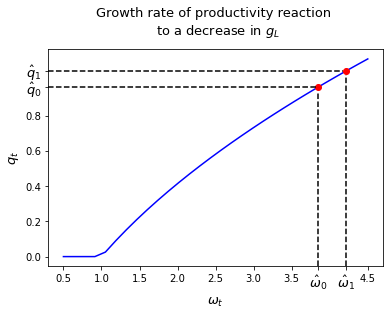

In [37]:
q_0 = opt_growth(ω0)
q_1 = opt_growth(ω1)

fig, ax = plt.subplots()

ax.set_title('Growth rate of productivity reaction \n to a decrease in $g_L$', fontsize=13, pad = 15)

grid_ω = np.linspace(0,4,100) #values for ω_t

ax.set_xlabel('$ω_t$')
ax.set_ylabel('$q_t$')

#set axes labels' fontsize
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

#plotting main function
ax.plot(grid, np.asanyarray([opt_growth(i) for i in grid], dtype=object) , 'b')
ax.plot(ω0, q_0, 'ro')
ax.plot(ω1, q_1, 'ro')

#plotting dotted lines
ax.axhline(y=q_0, xmax=0.8 , linestyle='--', color='k')
ax.axhline(y=q_1, xmax=0.88 , linestyle='--', color='k')
ax.axvline(x=ω0, ymax=0.8, linestyle='--', color='k')
ax.axvline(x=ω1, ymax=0.88, linestyle='--', color='k')

#setting ticks
ax.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, float(ω0), float(ω1), 4.5], ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '$\\hat{\omega}_0$', '$\\hat{\omega}_1$', '4.5'])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8 , float(q_0), float(q_1)], ['0.0', '0.2', '0.4', '0.6', '0.8','$\\hat{q}_0$', '$\\hat{q}_1$'])
plt.setp(ax.get_xticklabels()[7], fontsize=13)
plt.setp(ax.get_xticklabels()[8], fontsize=13)
plt.setp(ax.get_yticklabels()[5], fontsize=13)
plt.setp(ax.get_yticklabels()[6], fontsize=13)

plt.savefig('q_fertility', facecolor='white', bbox_inches="tight")

3. GDP falls in response to a decline in fertility and per-capita GDP may increase or decrease.
<br>
In particular, higher equilibrium wage induced by the decrease in $g_L$ has two effects : increases $q_{t+1}$ (no first-order effect) and decreases $H^d_{t+1}$, which lowers $\hat{GDP}_{t+1}$.
<br>
Per-capita GDP increases if and only if the growth rate of $\hat{GDP}_{t+1}$ induced by a decrease in $g_L$ is lower than the population growth rate $\frac{1}{\mu + 1 + g_L}$.

In [38]:
#GDP in t
GDP_t = GDP(ω_t, K_t) 

#GDP in t+1 corresponding to each value of g_L 
eq_GDP = [GDP(ω, K_tplus1(L_t, μ, ω_t, A)) for ω in ω_tplus1]

#computation of total population in t+1
P = [L_t*(1+g) + μ*L_t for g in grid_g]  

#per capita GDP 
eq_gdp = [i/p for i,p in zip(eq_GDP, P)] 

#grow rate of GDP
growth_rate_GDP = []
for i in range(len(grid_g)):
    gr= ((eq_GDP[i]-GDP_t)/(grid_g[i]-g_L))/eq_GDP[i]
    growth_rate_GDP.append(gr)

#population growth rate
growth_rate_pop = [1/(1+μ+i) for i in grid_g] 


C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


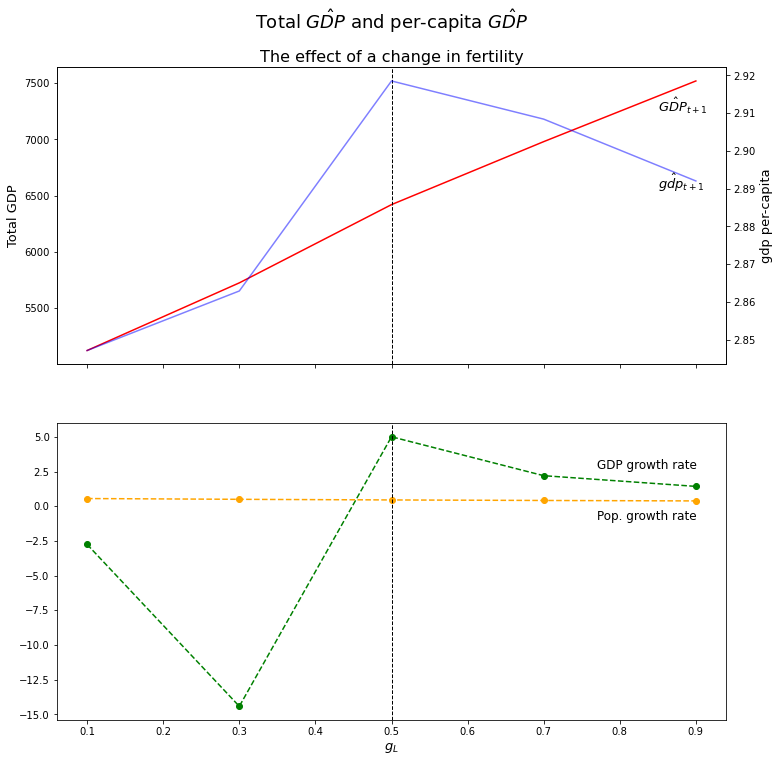

In [39]:

fig, (ax1,ax3) = plt.subplots(2,1,figsize=(12,12))

for ax in fig.get_axes():
    ax.label_outer()
    
# Mid point of left and right x-positions
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

#title
fig.suptitle('Total $\\hat{GDP}$ and per-capita $\\hat{GDP}$', x=mid, y=0.95, fontsize=18)
ax1.set_title('The effect of a change in fertility', fontsize=16)

#################################################################
#plot GDP
ax1.plot(grid_g, eq_GDP, label = '$\\hat{GDP}_{t+1}$', color= 'r')

#label axis
ax1.set_ylabel('Total GDP', fontsize=13)
ax3.set_xlabel('$g_L$',fontsize=13)

#################################################################
#plot growth rates
ax3.plot(grid_g, growth_rate_GDP, '--go')
ax3.plot(grid_g, growth_rate_pop, '--o', color='orange')

################################################################
#plot gdp per-capita
# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grid_g, eq_gdp, label = '$\\hat{gdp}_{t+1}$', color='b', alpha=0.5)
#label right ax
ax2.set_ylabel("gdp per-capita", fontsize=13)

################################################################
ax1.axvline(x=0.5, linestyle='--', color='k', linewidth=1)
ax3.axvline(x=0.5, linestyle='--', color='k', linewidth=1)

ax1.text(0.85, 7250, '$\\hat{GDP}_{t+1}$', fontsize=13)
ax2.text(0.85, 2.89, '$\\hat{gdp}_{t+1}$', fontsize=13)
ax3.text(0.77, 2.7, 'GDP growth rate', fontsize=12)
ax3.text(0.77, -1, 'Pop. growth rate', fontsize=12)

plt.savefig('gdp_fertility', facecolor='white')

4. Decrease of fertility lowers Labor share in t+1. Indeed, higher wage implies higher $q_{t+1}$, implying higher investment outlays and less working hours (rationalization effect); this dominates the positive effect of higher wage on labor share.

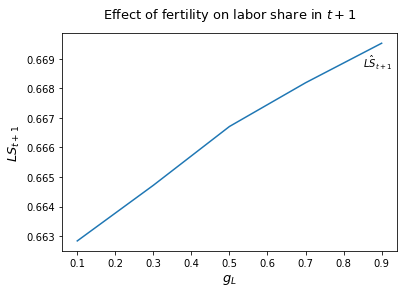

In [40]:
LS = [labor_share(ω , K_t) for ω in ω_tplus1]

fig, ax = plt.subplots()

ax.set_title('Effect of fertility on labor share in $t+1$', fontsize=13, pad=15)

ax.plot(grid_g, LS)

ax.set_xlabel('$g_L$', fontsize = 13)
ax.set_ylabel('$LS_{t+1}$', fontsize = 13)

ax.text(0.85,0.6687, '$\\hat{LS}_{t+1}$')


plt.savefig('labor_share_fertility', facecolor='white', bbox_inches="tight")

# 5. Long run macroeconomic implications of population aging

In the last part of my simulation I look at the effects of population aging on the steady state. I simulate steady states for two otherwise identical economies, differing in $g_L$ and $\mu$. I did this under the assumption that the steady state is reached in $t+1$.

In the long run population aging determines, irrespective of its source, a higher wage and efficient capital, hence faster growth rate of automation, lower labor shares, and faster growth rate of per-capita GDP.

Effect on steady state of an **increase in $\mu$**:

In [41]:
#compute the 2 steady states

#increasing longevity
μ0 = 0.4
μ1 = 0.7

#steady state capital and wage with mu = 0.7 have been computed before
k_ss1 = k_ss
ω_ss1 = ω_ss

#compute steady state capital and wage with mu = 0.4
k_ss0, ω_ss0 = steady_state(L_t, μ0, A, g_L)


C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\4079090199.py:12: RuntimeWarning: invalid value encountered in power
  return Γ*(1 - γ)*(K_t**γ)*(N_t**(- γ)) - cost_function(ω_t, q_t)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:92: 

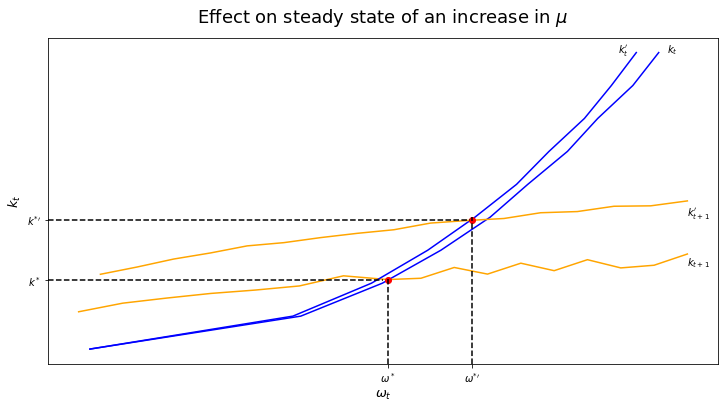

In [42]:

#if the economy embarks in a steady state in the first period this should be the result:

grid_k = np.linspace(0,1,10)

grid_ω = np.linspace(0,7,20)

#a more appropriate grid for mu = 0.4
grid_ω1 = np.concatenate([np.linspace(0, ω_ss0, 10),np.linspace(ω_ss0, 7, 10)])


fig,ax = plt.subplots(figsize=(12,6))

ax.set_title('Effect on steady state of an increase in $\mu$', fontsize=18, pad=15)

ax.set_xlabel(r'$\omega_t$', fontsize=13)
ax.set_ylabel(r'$k_t$', fontsize=13)

##########################################################################################
#compute labor market equilibrium locus for mu = 0.4
ax.plot([eq_wage(L_t, μ0, i*(A**(1-v))*L_t) for i in grid_k], grid_k, 'b', label='$k_t$')

#compute capital market equilibrium locus for mu = 0.4
ax.plot(grid_ω1, [k_tplus1(L_t, μ0, i, A, g_L) for i in grid_ω1], 'orange', label='$k_{t+1}$')

#steady state with mu = 0.4
ax.plot(ω_ss0, k_ss0, 'ro')

##########################################################################################
#compute labor market equilibrium locus for mu = 0.7
ax.plot([eq_wage(L_t, μ1, i*(A**(1-v))*L_t) for i in grid_k], grid_k, 'b', label='$k^\prime_t$')

#compute capital market equilibrium locus for mu = 0.7
ax.plot(grid_ω, [k_tplus1(L_t, μ1, i, A, g_L) for i in grid_ω], 'orange', label='$k^\prime_{t+1}$')

#steady state with mu = 0.7
ax.plot(ω_ss1, k_ss1, 'ro')

###########################################################################################

#dotted lines
ax.axvline(x=ω_ss0, ymax = 0.26, color='k', linestyle='--')
ax.axvline(x=ω_ss1, ymax = 0.45, color='k', linestyle='--')
ax.axhline(y = k_ss0, xmax=0.5, color='k', linestyle= '--')
ax.axhline(y = k_ss1, xmax=0.63, color='k', linestyle= '--')

#label functions
ax.text(7, 0.28, '$k_{t+1}$')
ax.text(7, 0.45, '$k^\prime_{t+1}$')
ax.text(6.8, 1, '$k_{t}$')
ax.text(6.3, 1, '$k^\prime_{t}$')

#ticks
ax.set_xticks([float(ω_ss0), float(ω_ss1)], ['$\omega^*$', '$\omega^{*\prime}$'])
ax.set_yticks([float(k_ss0), float(k_ss1)], ['$k^*$', '$k^{*\prime}$'])

plt.savefig('new_steadystate_longevity', facecolor='white')

Effect on steady state of a **decrease in $g_L$**:

In [43]:
#steady state capital and wage with g_L = 0.7
k_ss2, ω_ss2 = steady_state(L_t, μ, A, g0)

#compute steady state capital and wage with g_L = 0.3
k_ss3, ω_ss3 = steady_state(L_t, μ, A, g1)


C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)


C:\Users\39340\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(c_y) + np.log(1 - ϕ*(1-l_t)*(c_y**(v/(1-v)))) + μ*β*np.log(c_o)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\4079090199.py:12: RuntimeWarning: invalid value encountered in power
  return Γ*(1 - γ)*(K_t**γ)*(N_t**(- γ)) - cost_function(ω_t, q_t)
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:88: UserWarning: w_t too low
  warnings.warn('w_t too low')
C:\Users\39340\AppData\Local\Temp\ipykernel_5560\1921252794.py:92: 

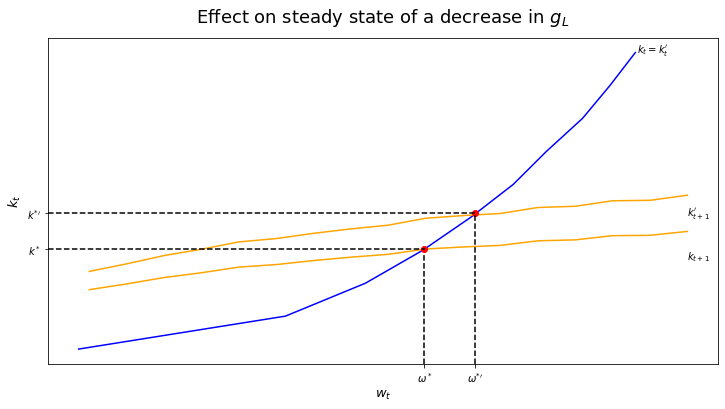

In [44]:
#if the economy embarks in a steady state in the first period this should be the result:

fig,ax = plt.subplots(figsize=(12,6))

ax.set_title('Effect on steady state of a decrease in $g_L$', fontsize=18, pad=15)

ax.set_xlabel(r'$w_t$', fontsize=13)
ax.set_ylabel(r'$k_t$', fontsize=13)

##########################################################################################
#compute labor market equilibrium locus for g_l = 0.7
ax.plot([eq_wage(L_t, μ, i*(A**(1-v))*L_t) for i in grid_k], grid_k, 'b', label='k_t')
#compute capital market equilibrium locus for g_L = 0.7
ax.plot(grid_ω, [k_tplus1(L_t, μ, i, A, g0) for i in grid_ω], 'orange', label='k_{t+1}')

#steady state with g_L = 0.7
ax.plot(ω_ss2, k_ss2, 'ro')

##########################################################################################
#compute capital market equilibrium locus for g_L = 0.3
ax.plot(grid_ω, [k_tplus1(L_t, μ, i, A, g1) for i in grid_ω], 'orange', label='k_{t+1}')

#steady state with g_L = 0.4
ax.plot(ω_ss3, k_ss3, 'ro')

###########################################################################################

#dotted lines
ax.axvline(x=ω_ss2, ymax=k_ss2, linestyle='--', color='k')
ax.axvline(x=ω_ss3, ymax=k_ss3, linestyle='--', color='k')
ax.axhline(y=k_ss2, xmax=ω_ss2/7.5 - 0.025, linestyle='--', color='k')
ax.axhline(y=k_ss3, xmax=ω_ss3/7.5 - 0.015, linestyle='--', color='k')

#label functions
ax.text(7, 0.3, '$k_{t+1}$')
ax.text(7, 0.45, '$k^\prime_{t+1}$')
ax.text(6.5, 1, '$k_{t} = k^\prime_{t}$')

#ticks
ax.set_xticks([float(ω_ss2), float(ω_ss3)], ['$\omega^*$', '$\omega^{*\prime}$'])
ax.set_yticks([float(k_ss2), float(k_ss3)], ['$k^*$', '$k^{*\prime}$'])

plt.savefig('steadystate_fertility', facecolor='white', bbox_inches="tight")

**Effect of population aging on $q^*$**:

In [45]:
#growth rate of aggregate technological knowledge with mu = 0.4
q_ss0 = opt_growth(ω_ss0)

#growth rate of aggregate technological knowledge with mu = 0.7
q_ss1 = opt_growth(ω_ss1)

#growth rate of aggregate technological knowledge with g_L = 0.7
q_ss2 = opt_growth(ω_ss2)

#growth rate of aggregate technological knowledge with g_L = 0.3
q_ss3 = opt_growth(ω_ss3)

print('Population aging makes $q^*$ increase.' + '\n' + 'Indeed, when $\mu$ increases from 0.4 to 0.7 $q^*$ increases from ' 
      + str(q_ss0) + ' to ' + str(q_ss1) + '; similarly, when $g_L$ decreases from 0.7 to 0.3, $q^*$ increases from '  
      + str(q_ss2) + ' to ' + str(q_ss3))

Population aging makes $q^*$ increase.
Indeed, when $\mu$ increases from 0.4 to 0.7 $q^*$ increases from [0.99735919] to [1.19899842]; similarly, when $g_L$ decreases from 0.7 to 0.3, $q^*$ increases from [1.09920275] to [1.2159267]


**Effect of population aging on long run growth rate of GDP**:

In [46]:
#GDP in steady state with mu = 0.4
GDP0_t = GDP(ω_ss0, k_ss0*(A**(1-v))*L_t)
#next period
GDP0_tplus1 = GDP(ω_ss0, k_ss0*((A*(1+q_ss0)**(1-v))*L_t*(1+g_L)))
#growth rate
gr_GDP0 = (GDP0_tplus1 - GDP0_t)/GDP0_t
                  
#GDP in steady state with mu = 0.7
GDP1_t = GDP(ω_ss1, k_ss1*(A**(1-v))*L_t)
#next period
GDP1_tplus1 = GDP(ω_ss1, k_ss1*((A*(1+q_ss1)**(1-v))*L_t*(1+g_L)))
#growth rate
gr_GDP1 = (GDP1_tplus1 - GDP1_t)/GDP1_t
                  
#GDP in steady state with g_l = 0.7
GDP2_t = GDP(ω_ss2, k_ss2*(A**(1-v))*L_t)
#next period
GDP2_tplus1 = GDP(ω_ss2, k_ss2*((A*(1+q_ss2)**(1-v))*L_t*(1+g0)))
#growth rate
gr_GDP2 = (GDP2_tplus1 - GDP2_t)/GDP2_t
                  
#GDP in steady state with g_l = 0.3
GDP3_t = GDP(ω_ss3, k_ss3*(A**(1-v))*L_t)
#next period
GDP3_tplus1 = GDP(ω_ss3, k_ss3*((A*(1+q_ss3)**(1-v))*L_t*(1+g1)))
#growth rate
gr_GDP3 = (GDP3_tplus1 - GDP3_t)/GDP3_t
                  
print('long run growth rate of GDP with $\mu=0.4$ is ' + str(gr_GDP0) + ', while when $\mu=0.7$ it increases to ' + str(gr_GDP1))
                  
print('long run growth rate of GDP with $g_L=0.7$ is ' + str(gr_GDP2) + ', while when $g_L=0.3$ it decreases to ' + str(gr_GDP3))

long run growth rate of GDP with $\mu=0.4$ is [1.26817154], while when $\mu=0.7$ it increases to [1.43782461]
long run growth rate of GDP with $g_L=0.7$ is [1.96476115], while when $g_L=0.3$ it decreases to [1.36107561]


**Effect of population aging on long run growth rate of GDP per capita**:

In [47]:
#MU = 0.4

#population in t
P0_t = L_t + μ0*L_t/(1+g_L)

#per capita GDP in t
gdp0_t = GDP0_t/P0_t

#population in t+1
P0_tplus1 = (1+g_L)*L_t+μ0*L_t

#per capita GDP in t
gdp0_tplus1 = GDP0_tplus1/P0_tplus1

#growth rate
gr_gdp0 = (gdp0_tplus1 - gdp0_t)/gdp0_t


#########################################
# mu = 0.7

#population in t
P1_t = L_t + μ1*L_t/(1+g_L)

#per capita GDP in t
gdp1_t = GDP1_t/P1_t

#population in t+1
P1_tplus1 = (1+g_L)*L_t+μ1*L_t

#per capita GDP in t
gdp1_tplus1 = GDP1_tplus1/P1_tplus1

#growth rate
gr_gdp1 = (gdp1_tplus1 - gdp1_t)/gdp1_t


##########################################
#g_L = 0.7

#population in t
P2_t = L_t + μ*L_t/(1+g0)

#per capita GDP in t
gdp2_t = GDP2_t/P2_t

#population in t+1
P2_tplus1 = (1+g0)*L_t+μ*L_t

#per capita GDP in t
gdp2_tplus1 = GDP2_tplus1/P2_tplus1

#growth rate
gr_gdp2 = (gdp2_tplus1 - gdp2_t)/gdp2_t


############################################
#g_L = 0.3

#population in t
P3_t = L_t + μ*L_t/(1+g1)

#per capita GDP in t
gdp3_t = GDP3_t/P3_t

#population in t+1
P3_tplus1 = (1+g1)*L_t+μ*L_t

#per capita GDP in t
gdp3_tplus1 = GDP3_tplus1/P3_tplus1

#growth rate
gr_gdp3 = (gdp3_tplus1 - gdp3_t)/gdp3_t


##########################################

print('long run growth rate of gdp increases with population aging. Indeed, when $\mu$ goes from 0.4 to 0.7 the rate goes from ' + str(gr_gdp0) + ' to ' + str(gr_gdp1) + '. Similarly, when fertility decreases from 0.7 to 0.3 the growth rate of gdp increases from ' + str(gr_gdp2) + ' to ' + str(gr_gdp3))


long run growth rate of gdp increases with population aging. Indeed, when $\mu$ goes from 0.4 to 0.7 the rate goes from [0.68012707] to [0.805796]. Similarly, when fertility decreases from 0.7 to 0.3 the growth rate of gdp increases from [0.74397715] to [0.81621201]


**Effect of population aging on labor share:**

In [48]:
#steady state mu = 0.4
LS0 = labor_share(ω_ss0, k_ss0*(A**(1-v))*L_t)

#steady state mu = 0.7
LS1 = labor_share(ω_ss1, k_ss1*(A**(1-v))*L_t)

#steady state g_l = 0.7
LS2 = labor_share(ω_ss2, k_ss2*(A**(1-v))*L_t)

#steady state mu = 0.3
LS3 = labor_share(ω_ss3, k_ss3*(A**(1-v))*L_t)

print('Population aging reduces steady-state labor share. When longevity increases labor share goes from ' 
      + str(LS0) + ' to ' + str(LS1) + ', when fertility decreases labor share goes from ' 
      + str(LS2)  + ' to ' + str(LS3))

Population aging reduces steady-state labor share. When longevity increases labor share goes from [0.66676462] to [0.66003006], when fertility decreases labor share goes from [0.66318441] to [0.65952597]
